In [49]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid", context="talk")

In [50]:
# Load the data
df = pd.read_csv('data/opsd_germany_daily.csv', parse_dates=True, index_col=0)

# Display the first few rows
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [8]:
# Check data types and non-null counts
df.info()

# Display summary statistics
df.describe().T

# Check for missing values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [51]:
# Interpolate missing values
df = df.interpolate(method='time')


In [53]:
# Date range and frequency
print("Date Range:")
print(f"Start date: {df.index.min()}")
print(f"End date:   {df.index.max()}")
print("\nInferred frequency of data:")
print(df.index.inferred_freq)

Date Range:
Start date: 2006-01-01 00:00:00
End date:   2017-12-31 00:00:00

Inferred frequency of data:
D


In [55]:
# Add useful time based collumns
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.day_name()

# Confirm additions
df.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


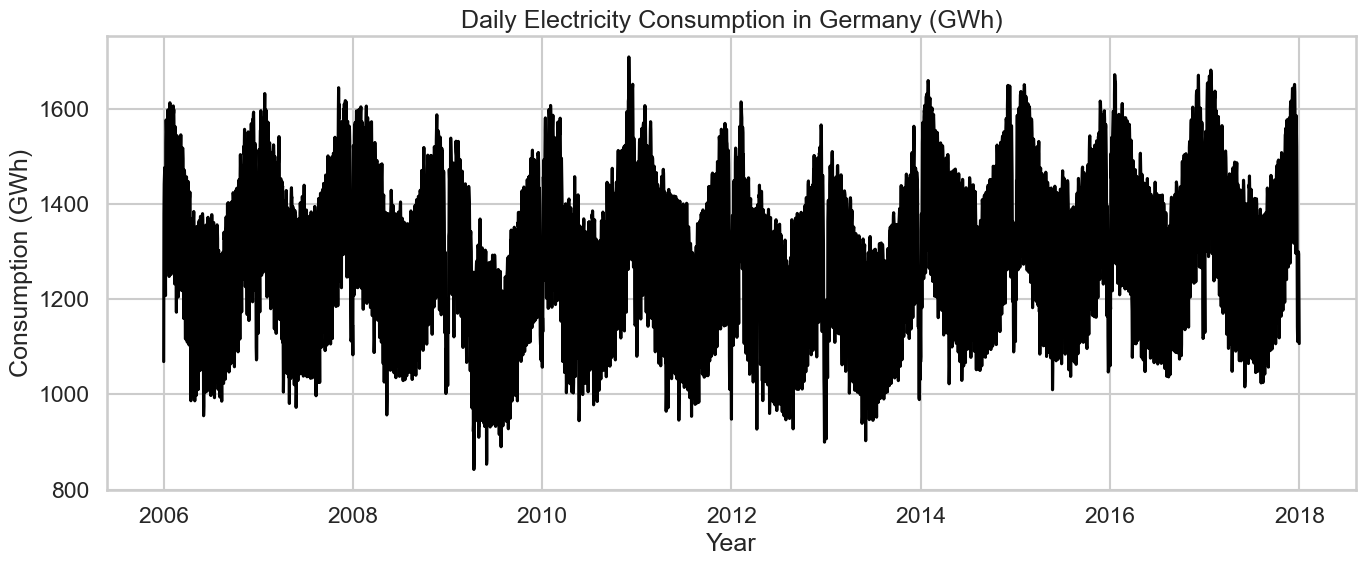

In [56]:
# Plot total electricity consumption and combined wind+solar generation
plt.figure(figsize=(14,6))
plt.plot(df['Consumption'], color='black')
plt.title('Daily Electricity Consumption in Germany (GWh)')
plt.xlabel('Year')
plt.ylabel('Consumption (GWh)')
plt.tight_layout()
plt.show()


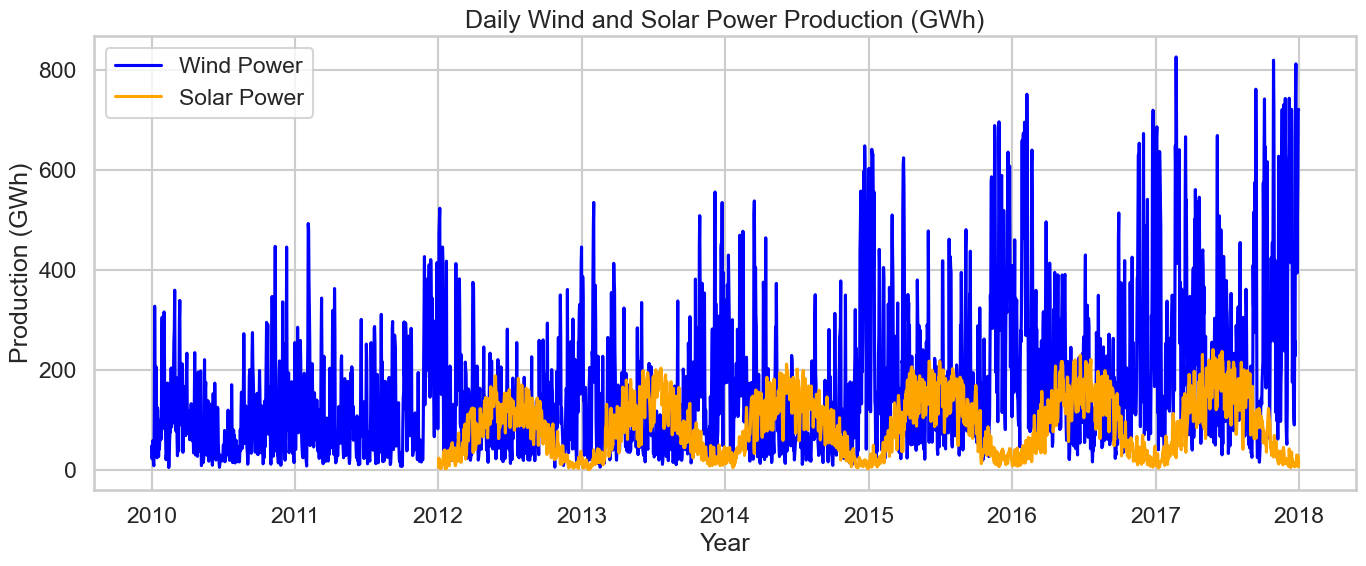

In [57]:
# Compare Wind vs Solar Power Production
plt.figure(figsize=(14,6))
plt.plot(df['Wind'], label='Wind Power', color='blue')
plt.plot(df['Solar'], label='Solar Power', color='orange')
plt.title('Daily Wind and Solar Power Production (GWh)')
plt.xlabel('Year')
plt.ylabel('Production (GWh)')
plt.legend()
plt.tight_layout()
plt.show()

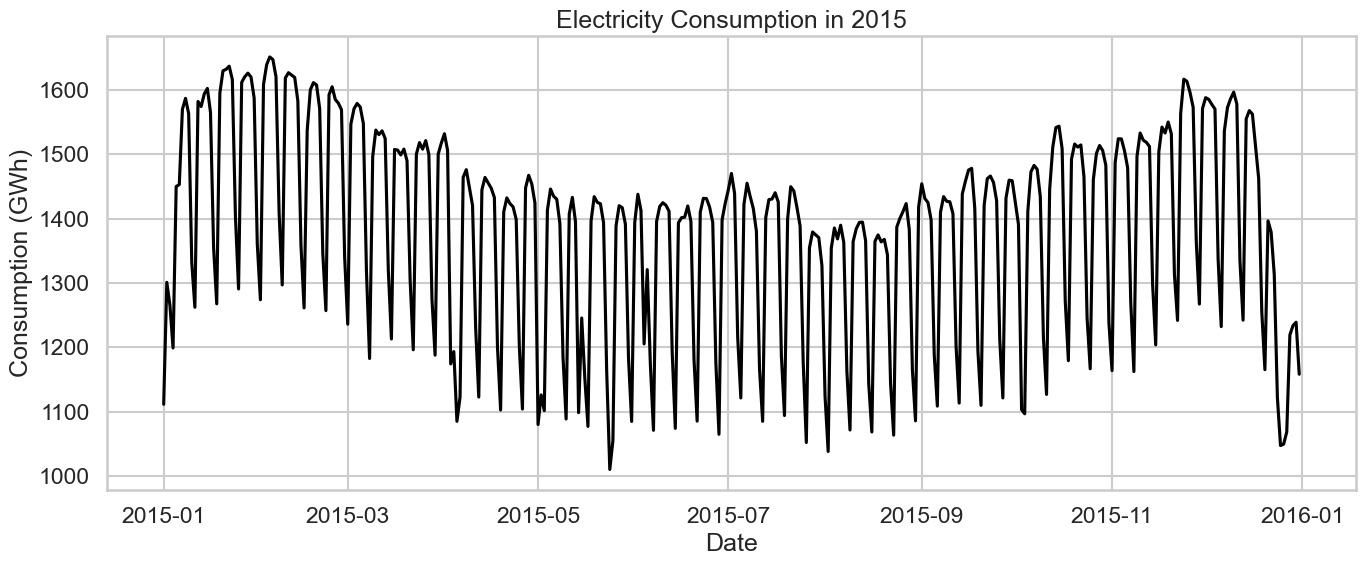

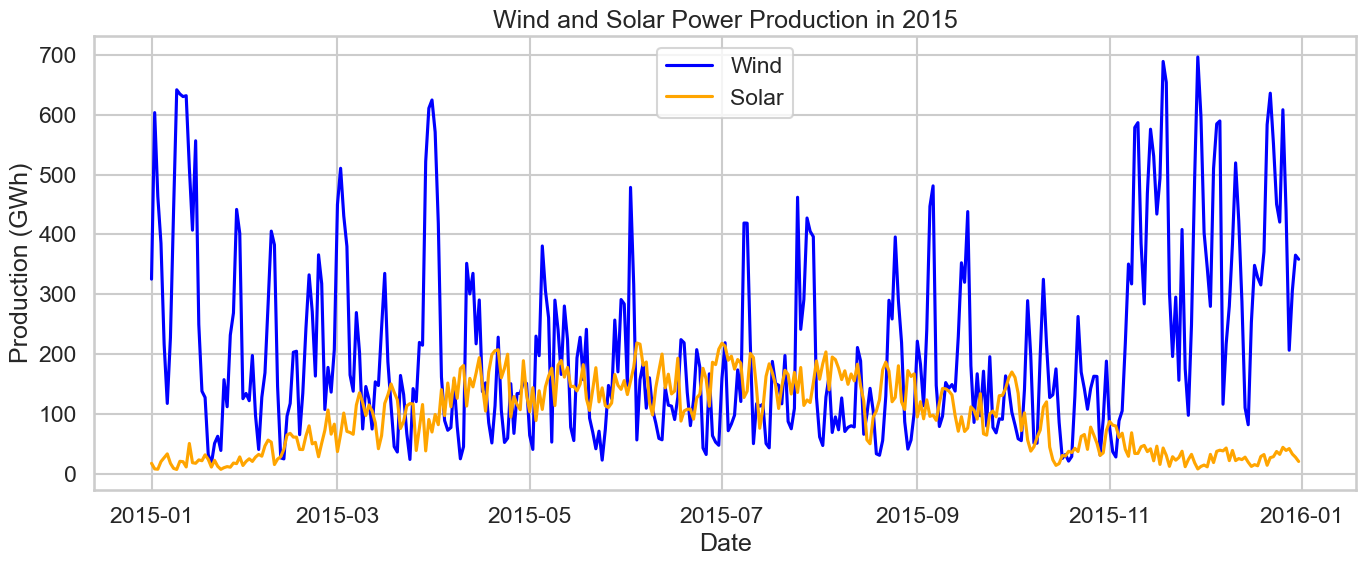

In [59]:
# 2015 Focus
focal_year = 2015
df_year = df[df['Year'] == focal_year]

# Consumption for one year
plt.figure(figsize=(14,6))
plt.plot(df_year['Consumption'], color='black')
plt.title(f'Electricity Consumption in {focal_year}')
plt.xlabel('Date')
plt.ylabel('Consumption (GWh)')
plt.tight_layout()
plt.show()

# Wind and Solar for one year
plt.figure(figsize=(14,6))
plt.plot(df_year['Wind'], label='Wind', color='blue')
plt.plot(df_year['Solar'], label='Solar', color='orange')
plt.title(f'Wind and Solar Power Production in {focal_year}')
plt.xlabel('Date')
plt.ylabel('Production (GWh)')
plt.legend()
plt.tight_layout()
plt.show()

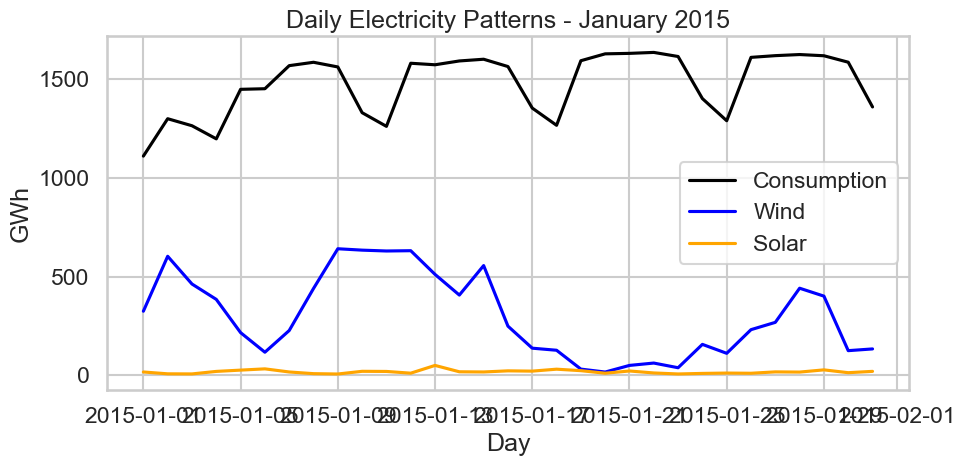

In [60]:
# January 2015
focal_month = (2015, 1)
df_month = df[(df['Year'] == focal_month[0]) & (df['Month'] == focal_month[1])]

plt.figure(figsize=(10,5))
plt.plot(df_month['Consumption'], label='Consumption', color='black')
plt.plot(df_month['Wind'], label='Wind', color='blue')
plt.plot(df_month['Solar'], label='Solar', color='orange')
plt.title('Daily Electricity Patterns - January 2015')
plt.xlabel('Day')
plt.ylabel('GWh')
plt.legend()
plt.tight_layout()
plt.show()

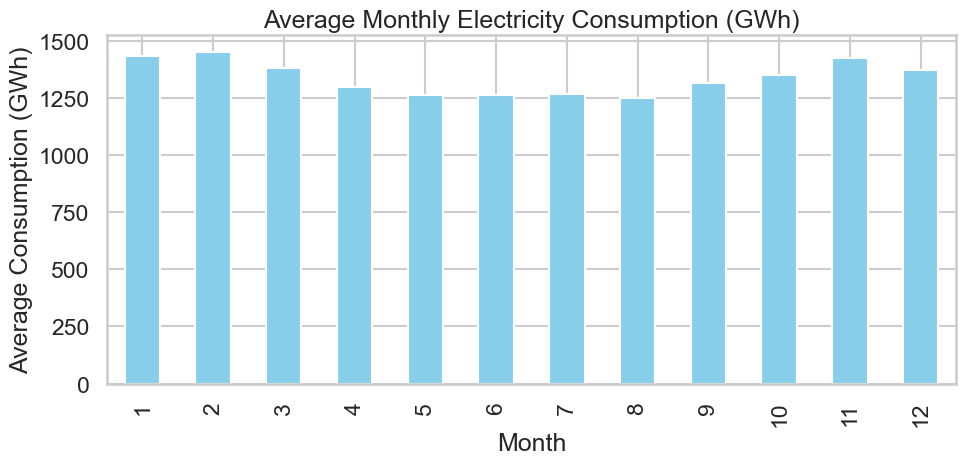

In [61]:
# Monthly Aggregation
monthly_stats = df.groupby('Month')['Consumption'].agg(['mean', 'max', 'min'])

# Plot average monthly consumption
monthly_stats['mean'].plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Average Monthly Electricity Consumption (GWh)')
plt.xlabel('Month')
plt.ylabel('Average Consumption (GWh)')
plt.tight_layout()
plt.show()

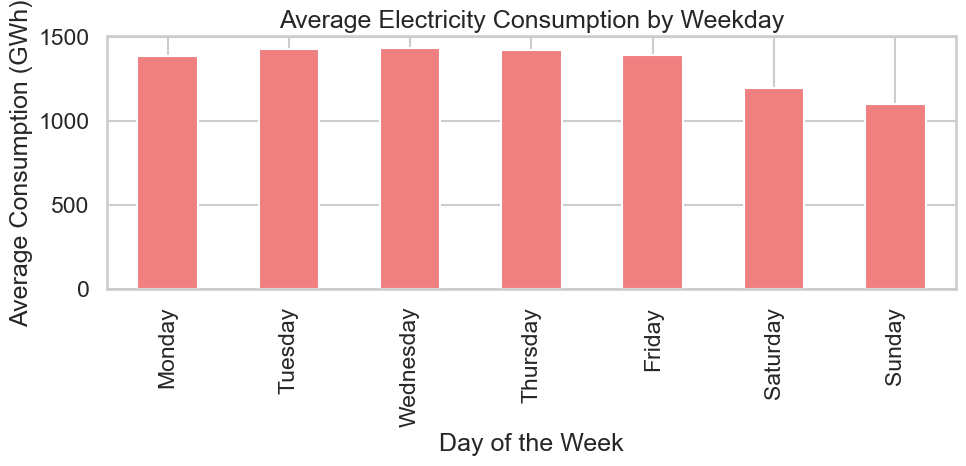

In [62]:
# Day-of-Week Analysis
weekday_avg = df.groupby('Weekday')['Consumption'].mean()
weekday_avg = weekday_avg.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

weekday_avg.plot(kind='bar', color='lightcoral', figsize=(10,5))
plt.title('Average Electricity Consumption by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Consumption (GWh)')
plt.tight_layout()
plt.show()

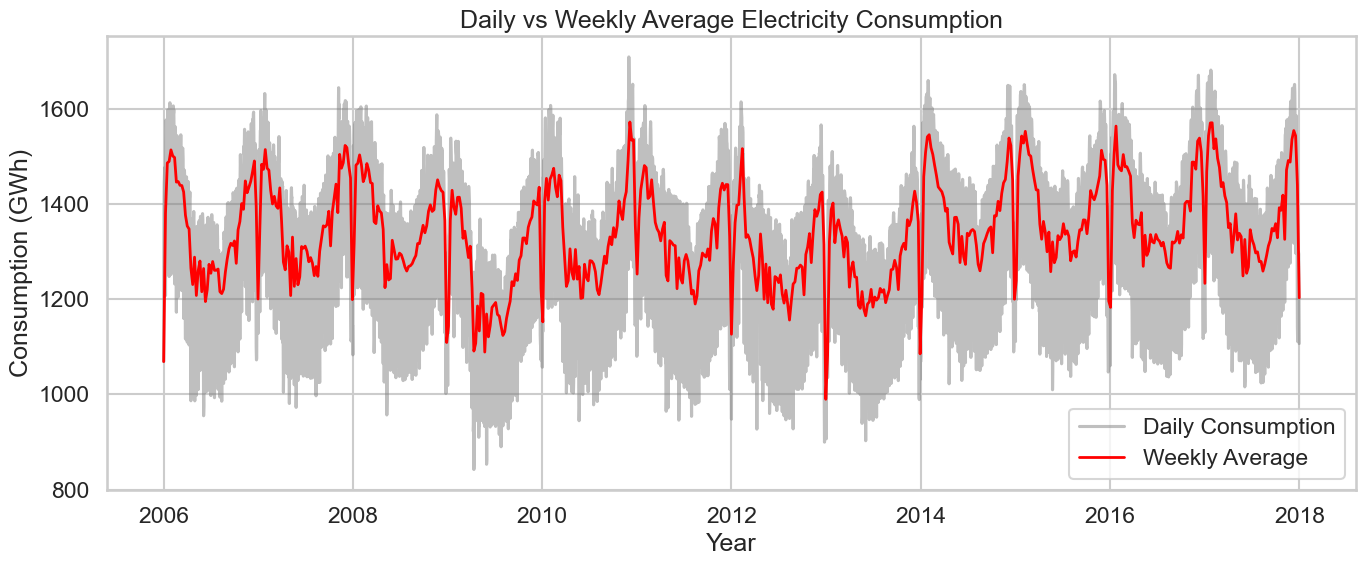

In [63]:
# Daily vs Weekly Averages
weekly = df['Consumption'].resample('W').mean()

plt.figure(figsize=(14,6))
plt.plot(df['Consumption'], label='Daily Consumption', alpha=0.5, color='gray')
plt.plot(weekly, label='Weekly Average', color='red', linewidth=2)
plt.title('Daily vs Weekly Average Electricity Consumption')
plt.xlabel('Year')
plt.ylabel('Consumption (GWh)')
plt.legend()
plt.tight_layout()
plt.show()

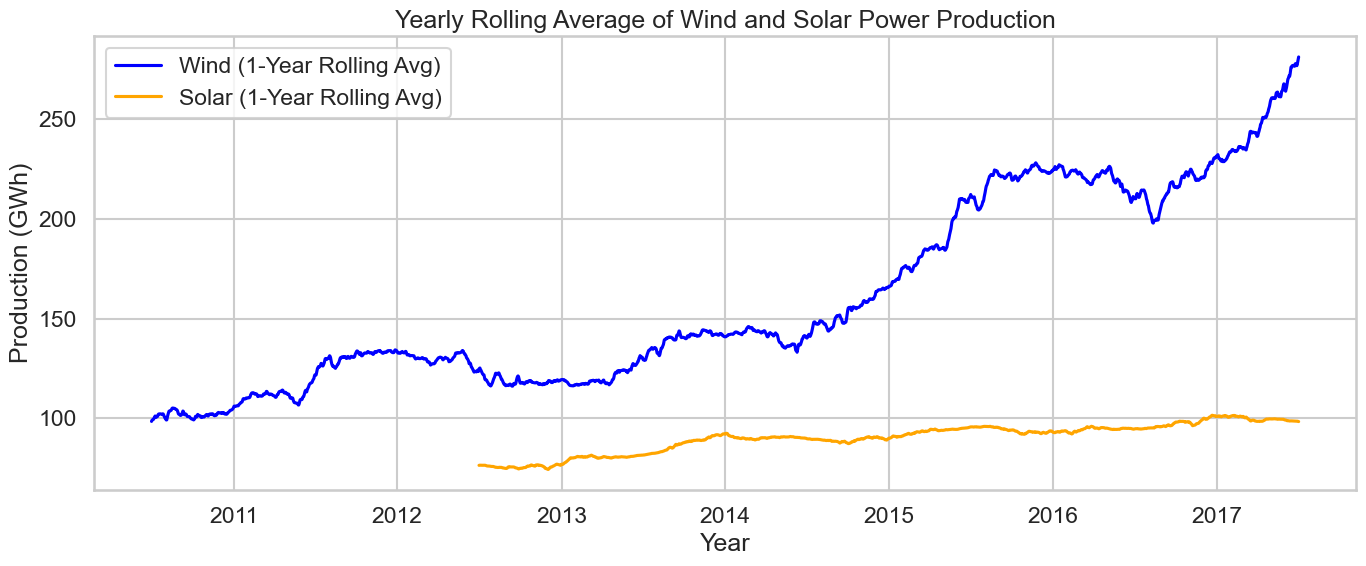

In [64]:
# Rolling Yearly Averages (Wind & Solar)
rolling = df[['Wind', 'Solar']].rolling(window=365, center=True).mean()

plt.figure(figsize=(14,6))
plt.plot(rolling['Wind'], label='Wind (1-Year Rolling Avg)', color='blue')
plt.plot(rolling['Solar'], label='Solar (1-Year Rolling Avg)', color='orange')
plt.title('Yearly Rolling Average of Wind and Solar Power Production')
plt.xlabel('Year')
plt.ylabel('Production (GWh)')
plt.legend()
plt.tight_layout()
plt.show()

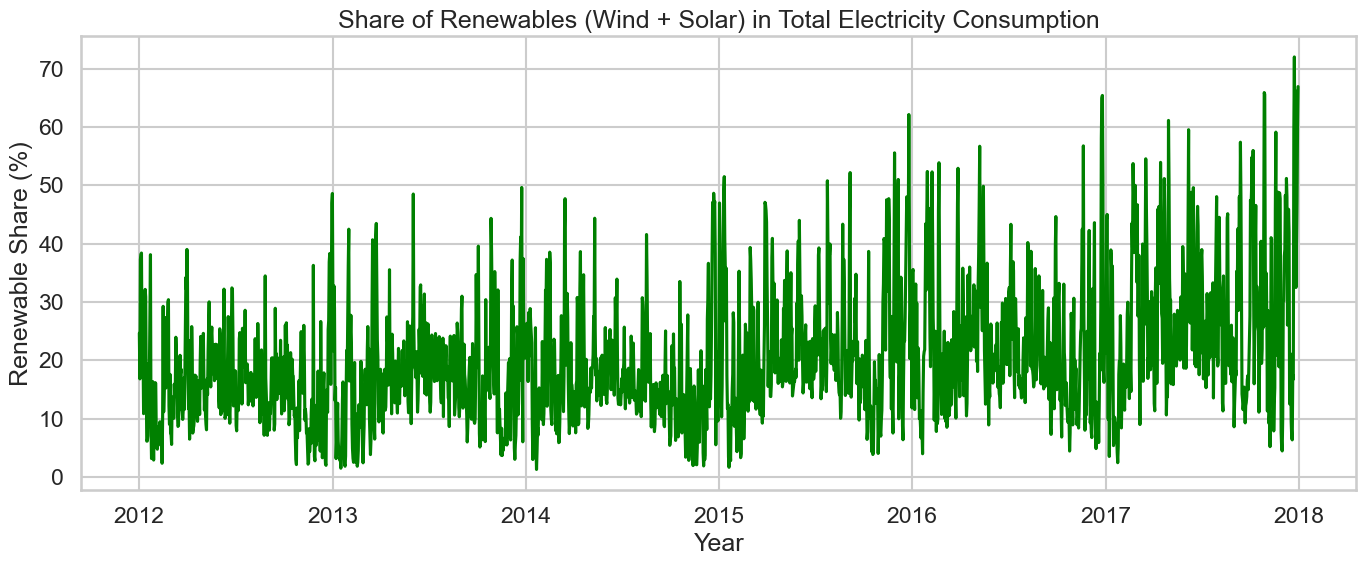

In [65]:
# Renewable Share in Total Consumption
df['Renewable Share (%)'] = (df['Wind+Solar'] / df['Consumption']) * 100

plt.figure(figsize=(14,6))
plt.plot(df['Renewable Share (%)'], color='green')
plt.title('Share of Renewables (Wind + Solar) in Total Electricity Consumption')
plt.xlabel('Year')
plt.ylabel('Renewable Share (%)')
plt.tight_layout()
plt.show()

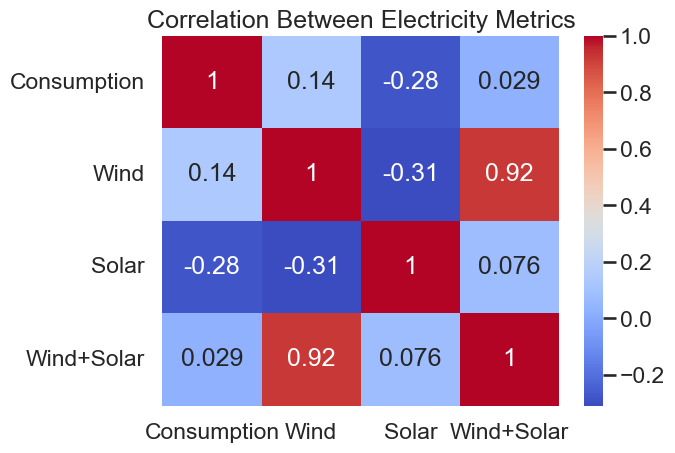

In [67]:
# Correlation Analysis
sns.heatmap(df[['Consumption','Wind','Solar','Wind+Solar']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Electricity Metrics')
plt.show()

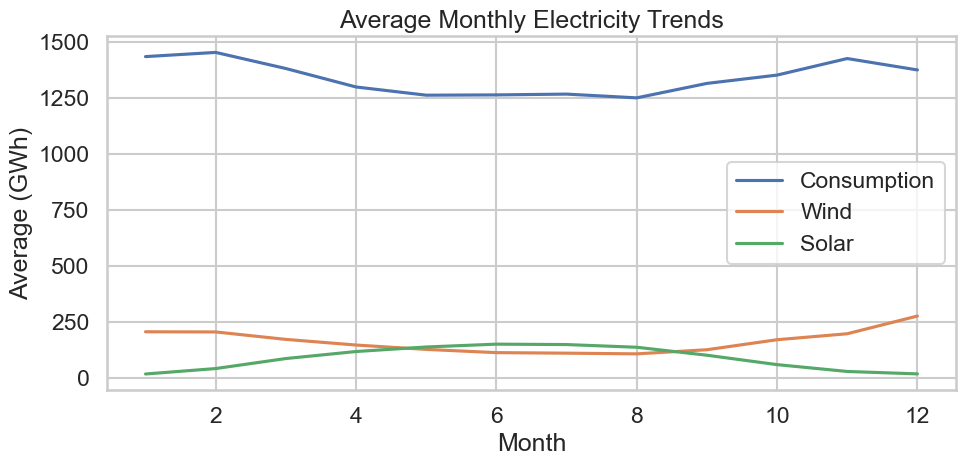

In [68]:
# Monthly Trends
monthly_avg = df.groupby('Month')[['Consumption','Wind','Solar']].mean()
monthly_avg.plot(figsize=(10,5))
plt.title('Average Monthly Electricity Trends')
plt.xlabel('Month')
plt.ylabel('Average (GWh)')
plt.tight_layout()
plt.show()